# Model Interpretability Using SHAP

#### SHapley Additive exPlanation (SHAP)

#### unlike the LIME framework, it considers additive feature importance. By definition, the Shapley value is the mean marginal contribution of each feature value across all possible values in the feature space. The mathematical understanding of Shapley values is complicated and might confuse most readers. That said, if you are interested in getting an in-depth mathematical understanding of Shapley values, we recommend that you take a look at the research paper called "A Value for n-Person Games." Contributions to the Theory of Games 2.28 (1953), by Lloyd S. Shapley. 

## What are Shapley values?


#### In this section, I will explain Shapley values using a very simple and easy-to-understand example. Let's suppose that Alice, Bob, and Charlie are three friends who are taking part, as a team, in a Kaggle competition to solve a given problem with ML, for a certain cash prize. Their collective goal is to win the competition and get the prize money. All three of them are equally not good in all areas of ML and, therefore, have contributed in different ways. Now, if they win the competition and earn their prize money, how will they ensure a fair distribution of the prize money considering their individual contributions? How will they measure their individual contributions for the same goal? The answer to these questions can be given by Shapley values, which were introduced in 1951 by Lloyd Shapley.

#### So, in this scenario, Alice, Bob, and Charlie are part of the same team, playing the same game (which is the Kaggle competition). In game theory, this is referred to as a Coalition Game. The prize money for the competition is their payout. So, Shapley values tell us the average contribution of each player to the payout ensuring a fair distribution. But why not just equally distribute the prize money between all the players? Well, since the contributions are not equal, it is not fair to distribute the money equally.

## Deciding the payouts

#### Now, how do we decide the fairest way to distribute the payout? One way is to assume that Alice, Bob, and Charlie joined the game in a sequence in which Alice started first, followed by Bob, and then followed by Charlie. Let's suppose that if Alice, Bob, and Charlie had participated alone, they would have gained 10 points, 20 points, and 25 points, respectively. But if only Alice and Bob teamed up, they might have received 40 points. While Alice and Charlie together could get 30 points, Bob and Charlie together could get 50 points. When all three of them collaborate together, only then do they get 90 points, which is sufficient for them to win the competition.

#### Please note that the order in which each player starts the game is important to consider as Shapley values try to account for the order of each player to calculate the marginal contribution.

## Shapley values in ML

#### In order to understand the importance of Shapley values in ML to explain model predictions, we will try to modify the example about Alice, Bob, and Charlie that we used for understanding Shapley values. We can consider Alice, Bob, and Charlie to be three different features present in a dataset used for training a model. So, in this case, the player contributions will be the contribution of each feature. The game or the Kaggle competition will be the black-box ML model and the payout will be the prediction. So, if we want to know the contribution of each feature toward the model prediction, we will use Shapley values.

#### Therefore, Shapley values help us to understand the collective contribution of each feature toward the outcome predicted by black-box ML models. By using Shapley values, we can explain the working of black-box models by estimating the feature contributions.

## Properties of Shapley values

#### Now that we have an intuitive understanding of Shapley values and we have learned how to calculate Shapley values, we should also gain an understanding of the properties of Shapley values:
- Efficiency: The total sum of Shapley values or the marginal contribution of each feature should be equal to the value of the total coalition. For example, in Figure 6.4, we can see that sum of individual Shapley values for Alice, Bob, and Charlie are equal to the total coalition value obtained when Alice, Bob, and Charlie team up together.
- Symmetry: Each player has a fair chance of joining the game in any order. in Figure 6.4, we can see that all permutations of the sequences for all the players are considered.
- Dummy: If a particular feature does not change the predicted value regardless of the coalition group, then the Shapley value for the feature is 0.
- Additivity: For any game with a combined payout, the Shapley values are also combined. For example, for the random forest algorithm in ML, Shapley values can be calculated for a particular feature by calculating it for each individual tree and then averaging them to find the additive Shapley value for the entire random forest.

## Global interpretability with dependence plots

#### In certain scenarios, it is important to analyze interactions between the features and how this interaction influences the model outcome. So, SHAP feature dependence plots show the variation of the model outcome by specific features. These plots are similar to the partial dependence plots, which were covered in Chapter 2, Model Explainability Methods. This plot can help to pick up interesting interaction patterns or trends between the feature values. The features used for selecting the color map are automatically picked up by the algorithm, based on the interaction with a specific selected feature.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
np.random.seed(123)
import seaborn as sns
import matplotlib.pyplot as plt

import shap
print(f"Shap version used: {shap.__version__}")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
# Initialize JS visualization for the notebook
shap.initjs()

data = pd.read_csv('/Users/maukanmir/Downloads/winequality-red.csv')
data

Shap version used: 0.45.1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


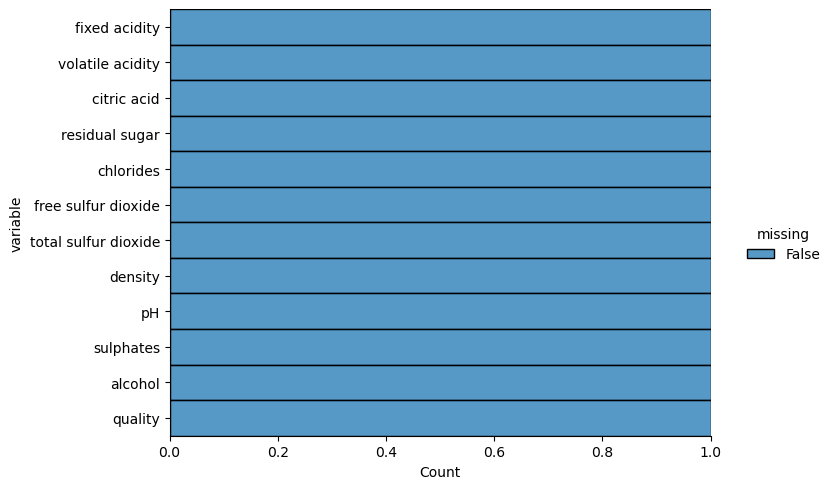

In [4]:
# Dropping missing values
data.fillna(0,inplace=True)

# Handling missing values
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)
plt.show()

In [5]:
features = data.drop(columns=['quality'])
labels = data['quality']
# Dividing the data into training-test set with 80:20 split ratio
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2, random_state=123)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
model.score(x_test, y_test)

0.34359614542907213

In [9]:

explainer = shap.LinearExplainer(model, x_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(x_test)


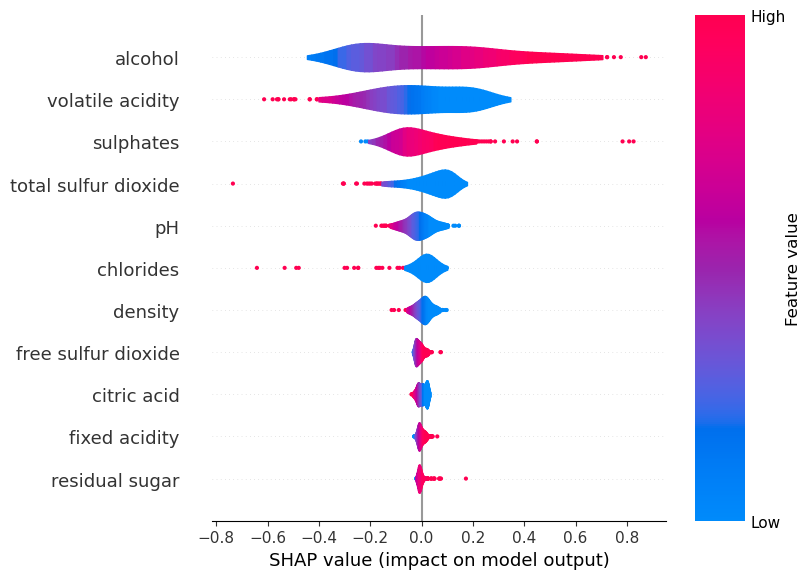

In [10]:

shap.summary_plot(shap_values, x_test, plot_type='violin', show=False)
plt.gcf().axes[-1].set_box_aspect(10)

In [11]:
# Local explainability with force plots
shap.force_plot(explainer.expected_value, shap_values[1], x_test.iloc[0,:])

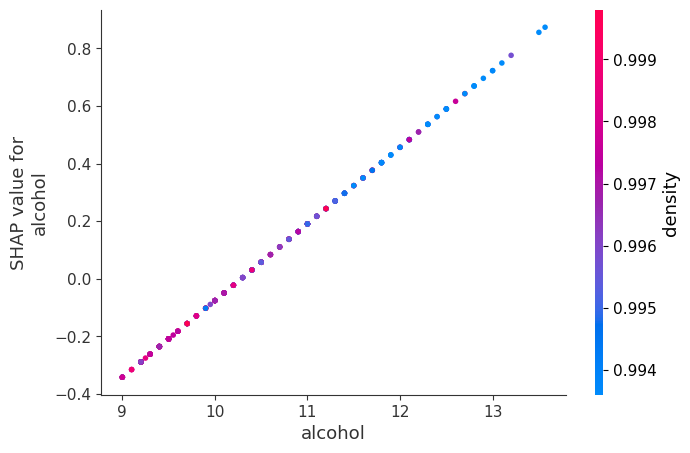

In [12]:
shap.dependence_plot("alcohol", shap_values, x_test, show=False)
plt.gcf().axes[-1].set_box_aspect(50)